# Project 3: Pendulum as a Standard of the Unit of Time

Importing necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from math import exp, sin, pi, sqrt, cos, log10, floor

## Numerical procedures - IVP (Initial Value Problem)

Definitions of the used functions representing three schemes for solving differential equations.


In [ ]:
# Euler's algorithm
def euler(a, b, n, y0, fun):
    """
    Returns the two list 'xp' and 'yp' which contain x axis values and y values
    being a solution to differential equation.
    Function values are evaluated using the Euler method.

    @Parameters
    ------------
    a : float
        The left limit of the x axis values.
    b : float
        The right limit of the x axis values.
    n : int
        The number of divisions between the left and right limit.
        This parameter is used to modify the grid parameter of the aproximation.
    y0 : float
        The value of the evaluated function at x equal 0.
    fun : function
        The differential equation represented by a function that takes two
        arguments (x, y).
    """
    h = (b - a) / n
    yp = [y0]
    xp = [a]
    for i in range(0, n):
        yp.append(yp[i] + h * fun(xp[i], yp[i]))
        xp.append(xp[i] + h)
    return xp, yp


# Adams-Bashforth algorithm
def ab3(a, b, n, f, fun):
    """
    Returns the two list 'xp' and 'yp' which contain x axis values and y values
    being a solution to differential equation.
    Function values are evaluated using the Adams-Bashofth method.

    @Parameters
    ------------
    a : float
        The left limit of the x axis values.
    b : float
        The right limit of the x axis values.
    n : int
        The number of divisions between the left and right limit.
        This parameter is used to modify the grid parameter of the aproximation.
    f : function
        Function expected as a result.
    fun : function
        The differential equation represented by a function that takes two
        arguments (x, y).
    """
    h = (b - a) / n
    yp = [1, f(h), f(2 * h)]
    xp = [a, a + h, a + h + h]
    for i in range(2, n):
        yp.append(yp[i] + h / 12.0 * (23.0 * fun(xp[i], yp[i])
        - 16.0 * fun(xp[i - 1], yp[i - 1]) + 5.0 * fun(xp[i - 2], yp[i - 2])))
        xp.append(xp[i] + h)
    return xp, yp


# Runge-Kutta algorithm
def rk4(a, b, n, y0, fun):
    """
    Returns the two list 'xp' and 'yp' which contain x axis values and y values
    being a solution to differential equation.
    Function values are evaluated using the Runge-Kutta method.

    @Parameters
    ------------
    a : float
        The left limit of the x axis values.
    b : float
        The right limit of the x axis values.
    n : int
        The number of divisions between the left and right limit.
        This parameter is used to modify the grid parameter of the aproximation.
    y0 : float
        The value of the evaluated function at x equal 0.
    fun : function
        The right side of the differential equation represented by a function
        that takes two arguments (x, y).
    """
    h = (b - a) / n
    yp = [y0]
    xp = [a]
    for i in range(0, n):
        k1 = h * fun(xp[i], yp[i])
        k2 = h * fun(xp[i] + h / 2.0, yp[i] + k1 / 2.0)
        k3 = h * fun(xp[i] + h / 2.0, yp[i] + k2 / 2.0)
        k4 = h * fun(xp[i] + h, yp[i] + k3)
        yp.append(yp[i] + (k1 + 2.0 * k2 + 2.0 * k3 + k4) / 6.0)
        xp.append(xp[i] + h)
    return xp, yp

### 3.4.2 Determination of the function that is the solution of the differential equation dy/dx = y, for y(0) = 1
Comparison of the operation of three schemes with the analytical solution

In [ ]:
# input parameters
a = 0.0
b = 1.0
n = 10

# function representing the right side of the differential equation
def func(x, y):
    """
    Returns the value of a function that represents the right side of
    differential equation.

    @Parameters
    ------------
    x : float
        The x argument of the function.
    y : float
        The y argument of the function.
    """
    return y


# calculations performed by three methods
eul_x, eul_y = euler(a, b, n, exp(0), func)
rk4_x, rk4_y = rk4(a, b, n, exp(0), func)
ab3_x, ab3_y = ab3(a, b, n, exp, func)

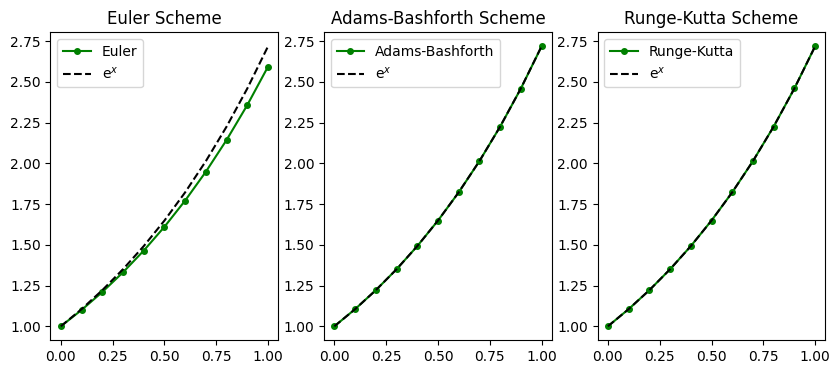

In [ ]:
# visualization of the obtained results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))

ax1.plot(eul_x, eul_y, 'go-', markersize=4, label='Euler')
ax1.plot(eul_x, [exp(x) for x in eul_x], 'k--', label='e$^x$')
ax1.set_title('Euler Scheme')
ax1.legend()

ax2.plot(ab3_x, ab3_y, 'go-', markersize=4, label='Adams-Bashforth')
ax2.plot(ab3_x, [exp(x) for x in ab3_x], 'k--', label='e$^x$')
ax2.set_title('Adams-Bashforth Scheme')
ax2.legend()

ax3.plot(rk4_x, rk4_y, 'go-', markersize=4, label='Runge-Kutta')
ax3.plot(rk4_x, [exp(x) for x in rk4_x], 'k--', label='e$^x$')
ax3.set_title('Runge-Kutta Scheme')
ax3.legend()

plt.show()


### 3.4.3 Checking the convergence of results with respect to the grid parameter h

In [ ]:
# input parameters
a = 0.0
b = 1.0

# declaration of lists storing the results of successive iterations of calculations
y1_eul = []
y1_rk4 = []
y1_ab3 = []
log10h = []

# calculations for the selected range of the parameter n determining the grid density
for n in np.logspace(1, 5):
    n = int(n)
    x, y = euler(a, b, n, exp(0), func)
    y1_eul.append(y[-1])
    x, y = rk4(a, b, n, exp(0), func)
    y1_rk4.append(y[-1])
    x, y = ab3(a, b, n, exp, func)
    y1_ab3.append(y[-1])
    log10h.append(-log10(1 / n))

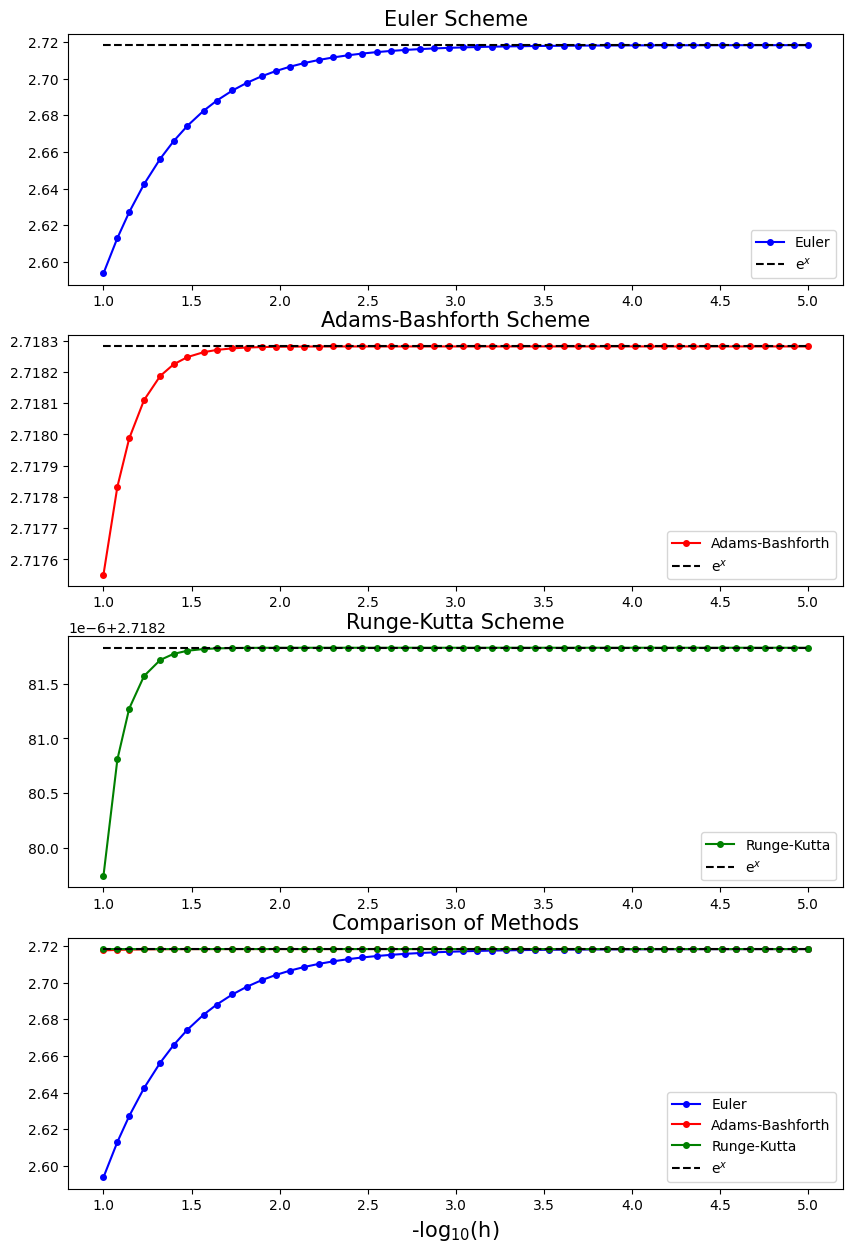

In [ ]:
# visualization of the collected data
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 15))

ax1.plot(log10h, y1_eul, 'bo-', markersize=4, label='Euler')
ax1.plot(log10h, [exp(1) for x in log10h], 'k--', label='e$^x$')
ax1.set_title('Euler Scheme', fontsize=15)
ax1.legend()

ax2.plot(log10h, y1_ab3, 'ro-', markersize=4, label='Adams-Bashforth')
ax2.plot(log10h, [exp(1) for x in log10h], 'k--', label='e$^x$')
ax2.set_title('Adams-Bashforth Scheme', fontsize=15)
ax2.legend()

ax3.plot(log10h, y1_rk4, 'go-', markersize=4, label='Runge-Kutta')
ax3.plot(log10h, [exp(1) for x in log10h], 'k--', label='e$^x$')
ax3.set_title('Runge-Kutta Scheme', fontsize=15)
ax3.legend()

ax4.plot(log10h, y1_eul, 'bo-', markersize=4, label='Euler')
ax4.plot(log10h, y1_ab3, 'ro-', markersize=4, label='Adams-Bashforth')
ax4.plot(log10h, y1_rk4, 'go-', markersize=4, label='Runge-Kutta')
ax4.plot(log10h, [exp(1) for x in log10h], 'k--', label='e$^x$')
ax4.set_title('Comparison of Methods', fontsize=15)
ax4.set_xlabel('-log$_{10}$(h)', fontsize=15)
ax4.legend()

plt.show()


### 3.4.4 Algorithms adapted to solve second-order differential equations

Auxiliary functions

In [ ]:
def aux_func_1(x, y1, y2):
    """
    Returns the value of a function that represents the first derivative of the
    right side of differential equation.

    @Parameters
    ------------
    x : float
        The x argument of the function.
    y1 : float
        The first y argument of the function.
    y2 : float
        The second y argument of the function.
    """
    return y2

def aux_func_2(x, y1, y2):
    """
    Returns the value of a function that represents the second order of the
    right side of differential equation.

    @Parameters
    ------------
    x : float
        The x argument of the function.
    y1 : float
        The first y argument of the function.
    y2 : float
        The second y argument of the function.
    """
    return -k * y1


def rk4_2d(a, b, n, y1_0, y2_0, fun1, fun2):
    """
    Returns the three lists 'xp', 'yp_1' and 'yp_2' which contain x axis values,
    y values being a solution to differential
    equation and y values representing the first derivative of that solution.
    Function values are evaluated using the Runge_Kutta method.

    @Parameters
    ------------
    a : float
        The left limit of the x axis values.
    b : float
        The right limit of the x axis values.
    n : int
        The number of divisions between the left and right limit.
        This parameter is used to modify the grid parameter of the aproximation.
    y1_0 : float
        The first derivative of the evaluated function at x equal 0.
    y2_0 : float
        The second derivative of the evaluated function at x equal 0.
    fun1 : function
        The first auxiliary function that takes three arguments (x, y1, y2).
    fun2 : function
        The second auxiliary function that takes three arguments (x, y1, y2).
    """
    h = (b - a) / n
    yp_1 = [y1_0]
    yp_2 = [y2_0]
    xp = [a]
    for i in range(0, n):
        k1_1 = h * fun1(xp[i], yp_1[i], yp_2[i])
        k1_2 = h * fun2(xp[i], yp_1[i], yp_2[i])

        k2_1 = h * fun1(xp[i] + h / 2.0,
                        yp_1[i] + k1_1 / 2.0,
                        yp_2[i] + k1_2 / 2.0)
        k2_2 = h * fun2(xp[i] + h / 2.0,
                        yp_1[i] + k1_1 / 2.0,
                        yp_2[i] + k1_2 / 2.0)

        k3_1 = h * fun1(xp[i] + h / 2.0,
                        yp_1[i] + k2_1 / 2.0,
                        yp_2[i] + k2_2 / 2.0)
        k3_2 = h * fun2(xp[i] + h / 2.0,
                        yp_1[i] + k2_1 / 2.0,
                        yp_2[i] + k2_2 / 2.0)

        k4_1 = h * fun1(xp[i] + h, yp_1[i] + k3_1, yp_2[i] + k3_2)
        k4_2 = h * fun2(xp[i] + h, yp_1[i] + k3_1, yp_2[i] + k3_2)

        yp_1.append(yp_1[i] + (k1_1 + 2.0 * k2_1 + 2.0 * k3_1 + k4_1) / 6.0)
        yp_2.append(yp_2[i] + (k1_2 + 2.0 * k2_2 + 2.0 * k3_2 + k4_2) / 6.0)
        xp.append(xp[i] + h)
    return xp, yp_1, yp_2

def euler_2d(a, b, n, y1_0, y2_0, fun1, fun2):
    """
    Returns the three lists 'xp', 'yp_1' and 'yp_2' which contain x axis values,
    y values being a solution to differential
    equation and y values representing the first derivative of that solution.
    Function values are evaluated using the Euler method.

    @Parameters
    ------------
    a : float
        The left limit of the x axis values.
    b : float
        The right limit of the x axis values.
    n : int
        The number of divisions between the left and right limit.
        This parameter is used to modify the grid parameter of the aproximation.
    y1_0 : float
        The first derivative of the evaluated function at x equal 0.
    y2_0 : float
        The second derivative of the evaluated function at x equal 0.
    fun1 : function
        The first auxiliary function that takes three arguments (x, y1, y2).
    fun2 : function
        The second auxiliary function that takes three arguments (x, y1, y2).
    """
    h = (b - a) / n
    yp_1 = [y1_0]
    yp_2 = [y2_0]
    xp = [a]
    for i in range(0, n):
        yp_1.append(yp_1[i] + h * fun1(xp[i], yp_1[i], yp_2[i]))
        yp_2.append(yp_2[i] + h * fun2(xp[i], yp_1[i], yp_2[i]))
        xp.append(xp[i] + h)
    return xp, yp_1, yp_2

def plot_harmonic_oscillator(x_lst, y1_lst, y2_lst):
    """
    Creates convenient plot to show the function being a solution to the
    harmonic oscillator equation.

    @Parameters
    ------------
    x_lst : list
        List of values on the x axis.
    y1_lst : list
        List of y values being a solution to differential equation.
    y2_lst : list
        List of y values representing the first derivative of 'y1_lst' values.

    @Notes
    ------
    x_lst, y1_lst, y2_lst : list
        Returned by the rk4_2d() and euler_2d() functions.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(x_lst, y1_lst, label='position')
    plt.plot(x_lst, y2_lst, label='velocity')
    plt.title('Solution of the equation d$^2$y/dx$^2$ = -ky '
              'for initial conditions y(0)=1, v(0)=1 and k = 10')
    plt.legend()
    plt.show()


Runge-Kutta Method:


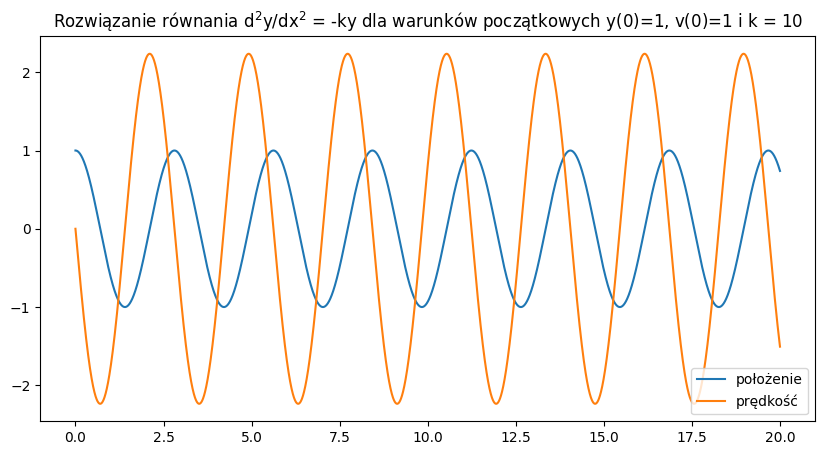

Euler Method:


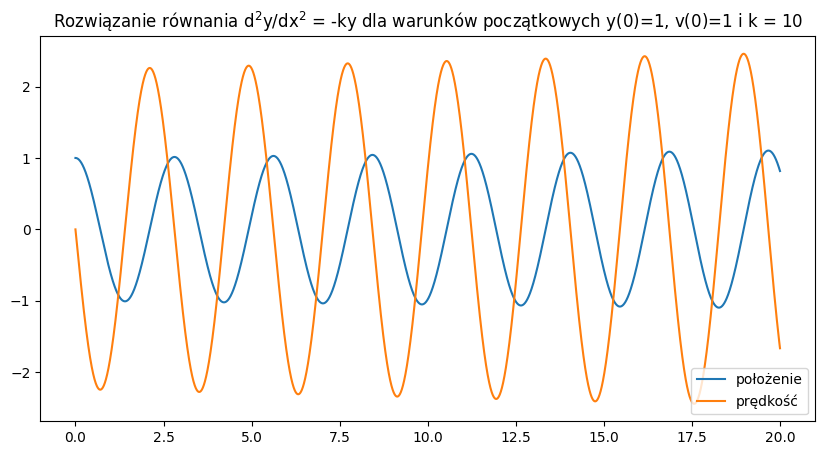

In [ ]:
# input data:
# k - spring constant
# a, b - range of position
# n - number of position divisions
k = 5.0
a = 0.0
b = 20.0
n = 10000

# using the defined functions above to solve the harmonic oscillator equation
# d2y/dx2 = -k; comparing results for two methods of solving differential equations
print('Runge-Kutta Method:')
rk4_x, rk4_y1, rk4_y2 = rk4_2d(a, b, n, 1, 0, aux_func_1, aux_func_2)
plot_harmonic_oscillator(rk4_x, rk4_y1, rk4_y2)

print('Euler Method:')
euler_x, euler_y1, euler_y2 = euler_2d(a, b, n, 1, 0, aux_func_1, aux_func_2)
plot_harmonic_oscillator(euler_x, euler_y1, euler_y2)

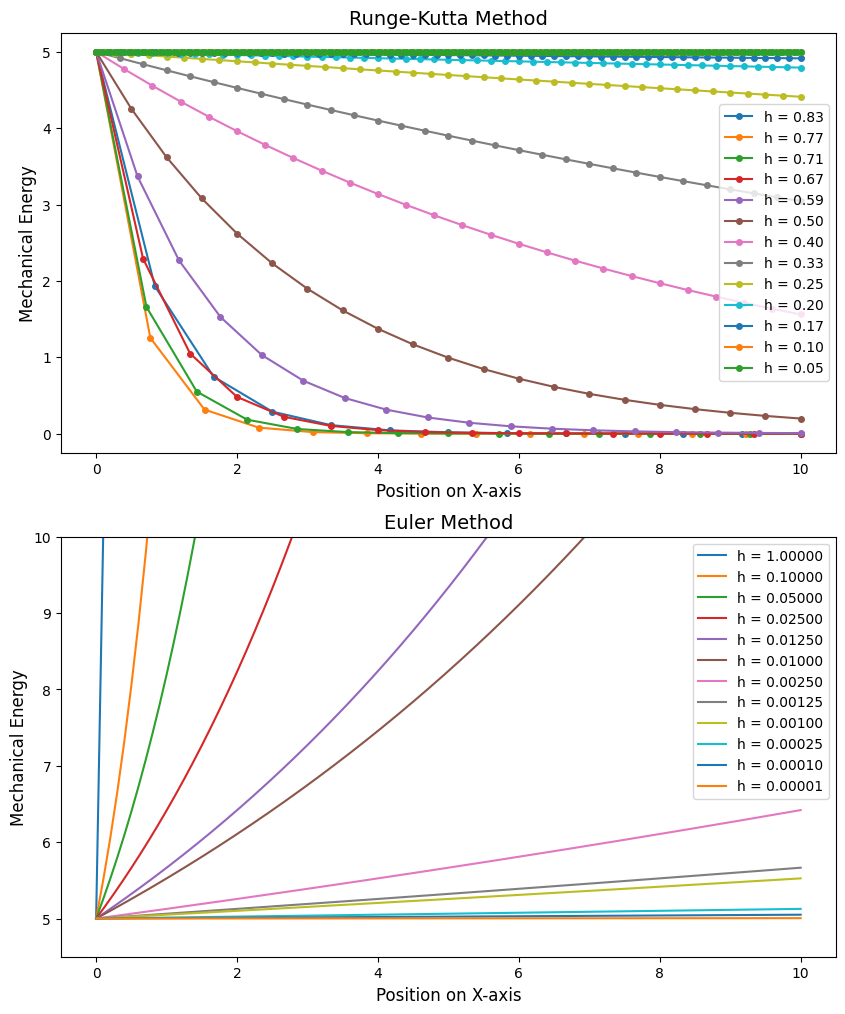

In [ ]:
# input parameters of the system
a = 0.0
b = 10.0
k = 10.0

# declaration of lists for additional information to compare both methods
# en_rk4, en_eul - total energies at x=10
# log10h_rk4, log10h_eul - logarithm of the grid parameter h
en_rk4 = []
en_eul = []
log10h_rk4 = []
log10h_eul = []

# calculations along with visualization comparing both methods of solving second-order differential equations:
# (1) change in total energy of the system with position for different values of the grid parameter h
# (2) total energy at x=10 as a function of the grid parameter h

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# in both cases, iteration is performed over representative values of n chosen arbitrarily
for n in [12, 13, 14, 15, 17, 20, 25, 30, 40, 50, 60, 100, 200]:
    n = int(n)
    log10h_rk4.append(-log10((b - a) / n))
    x, y1, y2 = rk4_2d(a, b, n, 1, 0, aux_func_1, aux_func_2)
    # Ep, Ek - lists storing calculated energy values over the entire position range
    Ep = [0.5 * k * y ** 2 for y in y1]
    Ek = [0.5 * 1 * y ** 2 for y in y2]
    en_rk4.append(Ep[-1] + Ek[-1])
    ax1.plot(x, [p + k for p, k in zip(Ep, Ek)], 'o-',
             label='h = {:.2f}'.format((b - a) / n), markersize=4)

for n in [10, 100, 200, 400, 800, 1000,
          4000, 8000, 10000, 40000, 100000, 1000000]:
    n = int(n)
    log10h_eul.append(-log10((b - a) / n))
    x, y1, y2 = euler_2d(a, b, n, 1, 0, aux_func_1, aux_func_2)
    Ep = [0.5 * k * y ** 2 for y in y1]
    Ek = [0.5 * 1 * y ** 2 for y in y2]
    en_eul.append(Ep[-1] + Ek[-1])
    ax2.plot(x, [p + k for p, k in zip(Ep, Ek)],
             label='h = {:.5f}'.format((b - a) / n))

ax1.set_title('Runge-Kutta Method', fontsize=14)
ax2.set_title('Euler Method', fontsize=14)
ax1.set_xlabel('Position on X-axis', fontsize=12)
ax2.set_xlabel('Position on X-axis', fontsize=12)
ax1.set_ylabel('Mechanical Energy', fontsize=12)
ax2.set_ylabel('Mechanical Energy', fontsize=12)
ax1.legend()
ax2.legend()
ax2.set_ylim(4.5, 10)
plt.show()

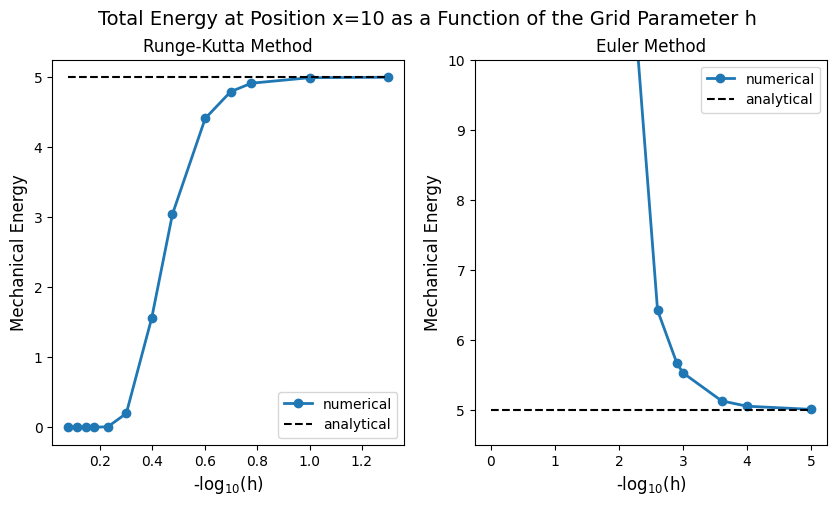

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Total Energy at Position x=10 as a Function of the Grid Parameter h',
             fontsize=14)

ax1.plot(log10h_rk4, en_rk4, 'o-', label='numerical',
         linewidth=2, markersize=6)
ax1.plot(log10h_rk4, [5.0 for x in log10h_rk4], 'k--', label='analytical')
ax1.set_title('Runge-Kutta Method', fontsize=12)
ax1.legend()
ax1.set_xlabel('-log$_{10}$(h)', fontsize=12)
ax1.set_ylabel('Mechanical Energy', fontsize=12)

ax2.plot(log10h_eul, en_eul, 'o-', label='numerical',
         linewidth=2, markersize=6)
ax2.plot(log10h_eul, [5.0 for x in log10h_eul], 'k--', label='analytical')
ax2.set_title('Euler Method', fontsize=12)
ax2.legend()
ax2.set_ylim(4.5, 10)
ax2.set_xlabel('-log$_{10}$(h)', fontsize=12)
ax2.set_ylabel('Mechanical Energy', fontsize=12)

plt.show()

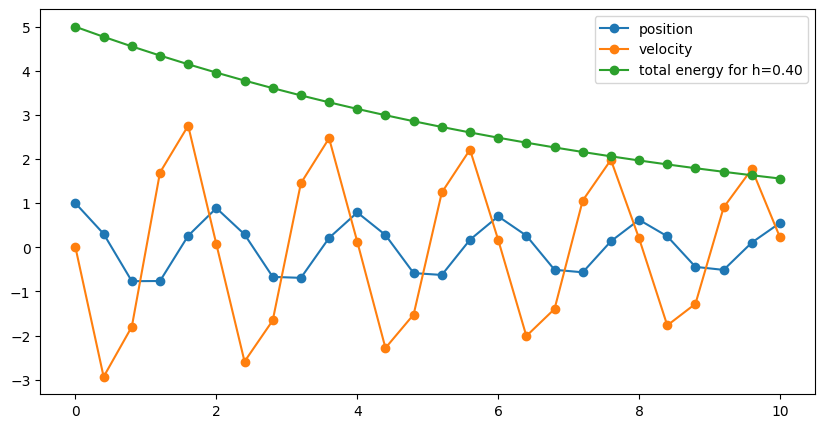

In [ ]:
# visualization of the reason why mechanical energy is not conserved in the range of larger grid parameters h
n = 25

xaxis, swing, velocity = rk4_2d(a, b, n, 1, 0, aux_func_1, aux_func_2)
Ep = [0.5 * k * y ** 2 for y in swing]
Ek = [0.5 * 1 * y ** 2 for y in velocity]

plt.figure(figsize=(10, 5))
plt.plot(xaxis, swing, 'o-', label='position')
plt.plot(xaxis, velocity, 'o-', label='velocity')
plt.plot(xaxis,[p + k for p, k in zip(Ep, Ek)], 'o-',
         label='total energy for h={:.2f}'.format((b - a) / n))
plt.legend()
plt.show()

### 3.4.1 *(supplementary)* Forced Oscillator Equation
Solving the differential equation d$^2$y/dx$^2$ -$\beta$ dy/dx + ky = Asin(wx) for fixed <br> parameters of a damped oscillator (spring constant, mass, damping constant) and appropriately <br> chosen time step (grid parameter).

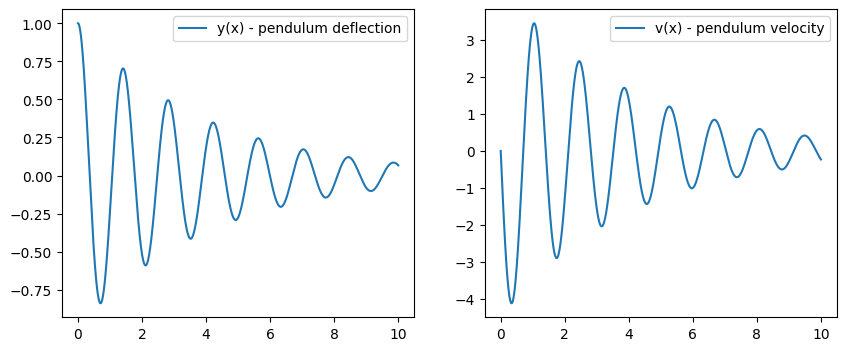

In [ ]:
### DAMPED OSCILLATOR ###

# input parameters: beta - damping coefficient
a = 0.0
b = 10.0
n = 10000
k = 20.0
beta = 0.5

# auxiliary functions analogous to aux_func_1() and aux_func_2(),
# adapted to the new differential equation
def aux_func_3(x, y1, y2):
    return y2

def aux_func_4(x, y1, y2):
    return -beta * y2 - k * y1

# test call and visualization of obtained results
test_results = rk4_2d(a, b, n, 1, 0, aux_func_3, aux_func_4)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(test_results[0], test_results[1], label = 'y(x) - pendulum deflection')
ax2.plot(test_results[0], test_results[2], label = 'v(x) - pendulum velocity')
ax1.legend()
ax2.legend()
plt.show()

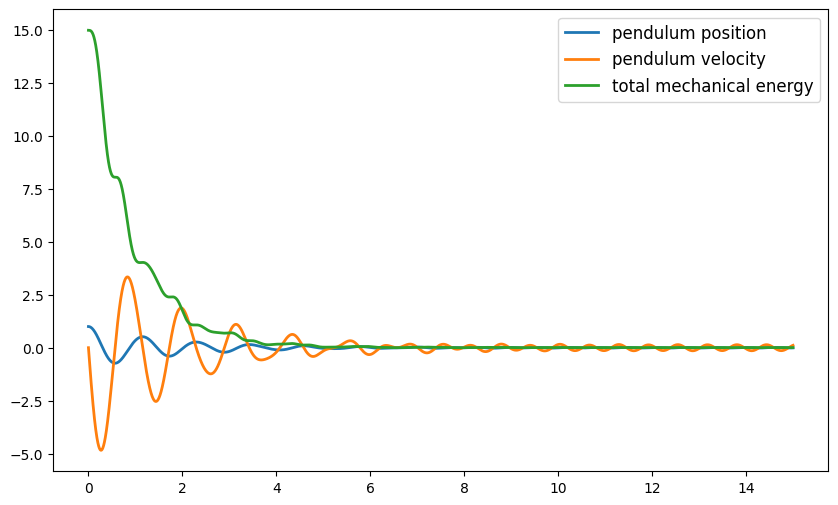

In [ ]:
### DRIVEN OSCILLATOR ###

# input parameters
a = 0.0
b = 15.0
n = 10000
k = 30.0
A = 1
omega = -10.0
beta = 1.1

# auxiliary functions analogous to aux_func_1() and aux_func_2(),
# adapted to the new differential equation
def aux_func_5(x, y1, y2):
    return y2

def aux_func_6(x, y1, y2):
    return A * sin(omega * x) - beta * y2 - k * y1

# calculations and visualization of obtained results
# (for example values of input parameters)
xaxis, swing, velocity = rk4_2d(a, b, n, 1, 0, aux_func_5, aux_func_6)
Ep = [0.5 * k * y ** 2 for y in swing]
Ek = [0.5 * 1 * y ** 2 for y in velocity]

plt.figure(figsize=(10, 6))
plt.plot(xaxis, swing, label='pendulum position', linewidth=2)
plt.plot(xaxis, velocity, label='pendulum velocity', linewidth=2)
plt.plot(xaxis, [p + k for p, k in zip(Ep, Ek)],
         label='total mechanical energy', linewidth=2)
plt.legend(fontsize=12)
plt.show()

## Compound Pendulum

### 3.4.1 Comparison of the period of small oscillations with analytical solution <br> (PENDULUM program test)

In [ ]:
def dfalfa(t, alf, om):
    """
    Returns the value of a function that represents the first derivative
    of the function over alfa.

    @Parameters
    ------------
    t : float
        The number representing the moment of time.
    alf : float
        The number representing the swing of the pendulum at that moment.
    om : float
        The number representing the angular velocity at that moment.
    """
    return om

def dfomega(t, alf, om):
    """
    Returns the value of a function that represents the first derivative
    of the function over omega.

    @Parameters
    ------------
    t : float
        The number representing the moment of time.
    alf : float
        The number representing the swing of the pendulum at that moment.
    om : float
        The number representing the angular velocity at that moment.
    """
    return -(g / l) * sin(alf)


# setting initial values of parameters and defining constants
g = 9.81
l = 1.0
m = 1.0
tE = 10.0
n = 10000
t0 = 0.0
alfa0 = 0.0
h = (tE - t0) / n

E = 0.0001
E0 = E * m * 2.0 * l * g
omega0 = sqrt(2.0 * E0 / m) / l

# performing calculations and determining the total energy
time, alfa, omega = rk4_2d(t0, tE, n, alfa0, omega0, dfalfa, dfomega)
Etot = [0.5 * m * l * l * om ** 2 + m * g * l * (1.0 - cos(alf))
for om, alf in zip(omega, alfa)]

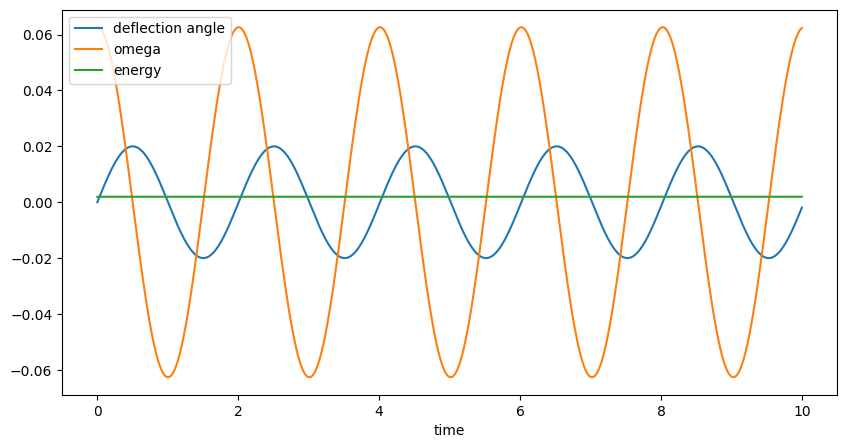

In [ ]:
# visualization of collected data
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 5))

ax1.plot(time, alfa, label='deflection angle')
ax1.plot(time, omega, label='omega')
ax1.plot(time, Etot, label='energy')
ax1.set_xlabel('time')
ax1.legend()

plt.show()

In [ ]:
# defining a function to determine the pendulum period
def pendulum_period(t, om):
    """
    Returns the pendulum period.

    @Parameters
    ------------
    t : list
        Contains the time points beeing the result of previous rk4_2d()
        calculations.
    om : list
        Contains the omega values beeing the result of previous rk4_2d()
        calculations.
    """
    extrema = []
    T2 = []
    down = True
    for i in range(len(om) - 1):
        if(down):
            if(om[i + 1] > om[i]):
                extrema.append(t[i])
                down = False
        else:
            if(om[i + 1] < om[i]):
                extrema.append(t[i])
                down = True
    for idx in range(len(extrema) - 1):
        T2.append(abs(extrema[idx + 1] - extrema[idx]))
    if(len(T2) == 0):
        return float('inf')
    else:
        return 2 * (sum(T2) / len(T2))

In [ ]:
print('''For parameters reflecting the period of small oscillations - maximum
total energy E = 0.001 we obtain numerical calculations matching
analytically determined value:\n''')
print('Analytical period of pendulum oscillations: ', 2 * pi * sqrt(l / g),
      '\nNumerical period of pendulum oscillations:  ', pendulum_period(time, omega))


For parameters reflecting the period of small oscillations - maximum
total energy E = 0.001 we obtain numerical calculations matching
analytically determined value:

Analytical period of pendulum oscillations:  2.0060666807106475 
Numerical period of pendulum oscillations:   2.006250000000109


### 3.4.2 Investigation of the dependence of the pendulum oscillation period on the value of total energy <br> expressed in units of maximum potential energy.

In [ ]:
# setting input parameters of the system
T0 = 2 * pi * sqrt(l / g)

# declaring lists to store calculation results
periods = []
periods_func_val = []
energies = []

# calculations
for i in np.arange(-4, 3, 0.25):
    E = 10 ** i
    E0 = E * m * 2.0 * l * g
    omega0 = sqrt(2.0 * E0 / m) / l
    time, alfa, omega = rk4_2d(t0, tE, n, alfa0, omega0, dfalfa, dfomega)
    T = pendulum_period(time, omega)
    energies.append(log10(E))
    if(T == float('inf')):
        periods.append(5)
        periods_func_val.append(3)
    else:
        periods.append(T)
        periods_func_val.append(abs((T - T0) / T0))

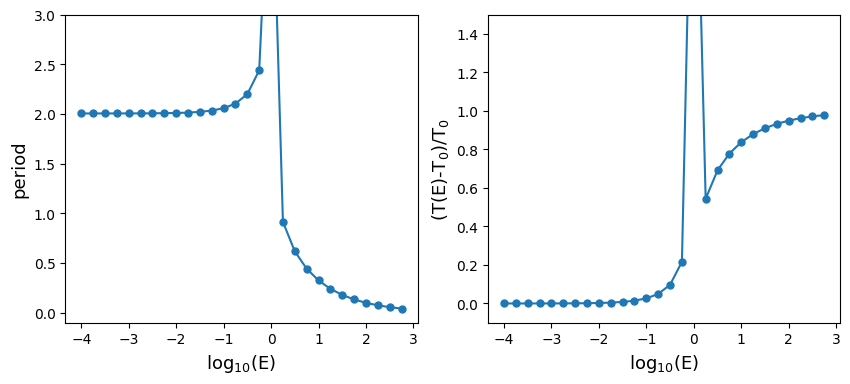

In [ ]:
# visualization of collected data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(energies, periods, 'o-', markersize=5)
ax1.set_ylim(-0.1, 3)
ax1.set_ylabel('period', fontsize=13)
ax1.set_xlabel('log$_{10}$(E)', fontsize=13)

ax2.plot(energies, periods_func_val, 'o-', markersize=5)
ax2.set_ylim(-0.1, 1.5)
ax2.set_ylabel('(T(E)-T$_0$)/T$_0$', fontsize=13)
ax2.set_xlabel('log$_{10}$(E)', fontsize=13)

plt.show()

### 3.4.3 Investigation of the course of the deflection angle function over time depending <br> on the grid parameter h for the case of maximum potential energy equal to 1.0


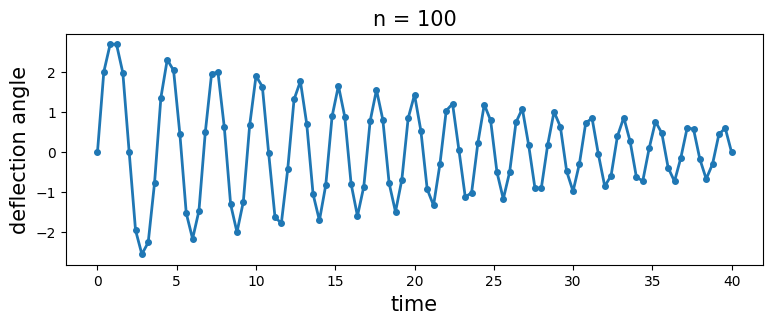

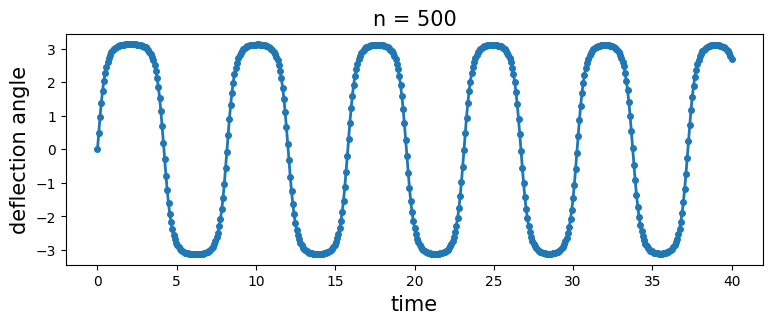

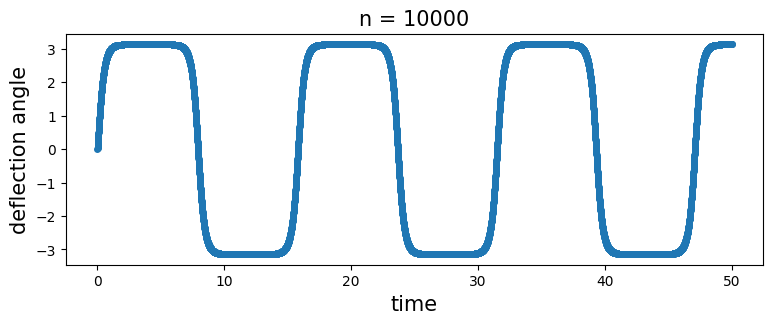

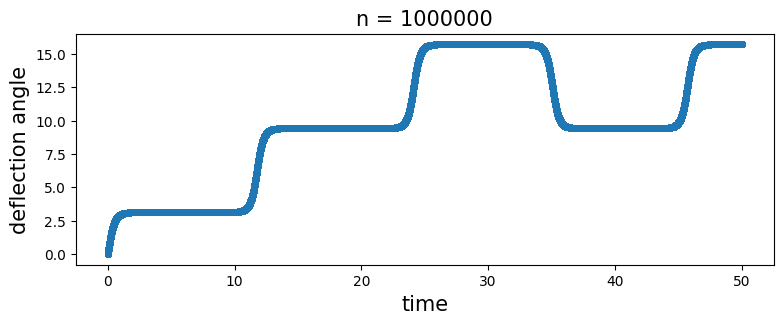

In [ ]:
def calculate_differential(tE, n):
    h = (tE - t0) / n
    return rk4_2d(t0, tE, n, alfa0, omega0, dfalfa, dfomega)

def plot_angle_time_dependance(t, a, n):
    plt.figure(figsize=(9, 3))
    plt.plot(t, a, 'o-', linewidth=2, markersize=4)
    plt.title('n = {}'.format(n), fontsize=15)
    plt.xlabel('time', fontsize=15)
    plt.ylabel('deflection angle', fontsize=15)
    plt.show()

# input data of the system
t0 = 0.0
E = 1.0
E0 = E * m * 2.0 * l * g
alfa0 = 0.0
omega0 = sqrt(2.0 * E0 / m) / l


# calculations and visualization of data for four representative cases
t100, a100, o100 = calculate_differential(40.0, 100)
plot_angle_time_dependance(t100, a100, 100)

t500, a500, o500 = calculate_differential(40.0, 500)
plot_angle_time_dependance(t500, a500, 500)

t10000, a10000, o10000 = calculate_differential(50.0, 10000)
plot_angle_time_dependance(t10000, a10000, 10000)

t1000000, a1000000, o1000000 = calculate_differential(50.0, 1000000)
plot_angle_time_dependance(t1000000, a1000000, 1000000)

## 3. Attachments
__The scripts below are not integral code with the JupyterLab environment. <br> They should be saved on your device as Python scripts and run <br> from the console or using other known tools.__

### 1. Interactive example of solving a differential equation from point 1.3 allowing changes to the value of the spring constant in real time.


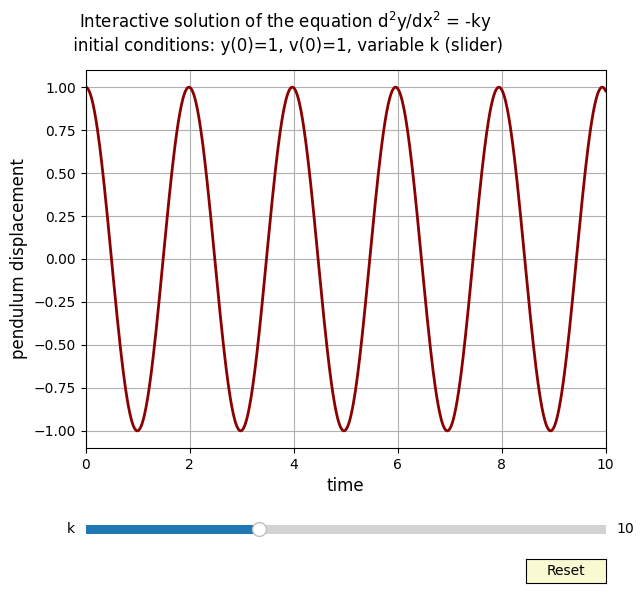

In [ ]:
####################
### 'wykres1.py' ###
####################


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

a = 0.0
b = 10.0
n = 1000


def f1(y2):
    """
    :param y2: float
        The second y argument of the function.
    :return: Returns the value of a function that represents the first
    derivative of the right side of the differential equation.
    """
    return y2


def f2(y1):
    """
    :param y1: float
        The first y argument of the function.
    :return: Returns the value of a function that represents the second order
    of the right side of differential equation.
    """
    return -k * y1


def rk4_2d(left, right, ndiv, y1_0, y2_0, fun1, fun2):
    """
    :param left: float
        The left limit of the x axis values.
    :param right: float
        The right limit of the x axis values.
    :param ndiv: int
        The number of divisions between the left and right limit.
        This parameter is used to modify the grid parameter of the aproximation.
    :param y1_0: float
        The first derivative of the evaluated function at x equal 0.
    :param y2_0: float
        The second derivative of the evaluated function at x equal 0.
    :param fun1: function
        The first auxiliary function that takes three arguments (x, y1, y2).
    :param fun2: function
        The second auxiliary function that takes three arguments (x, y1, y2).
    :return: Returns the three lists 'xp', 'yp_1' and 'yp_2' which contain
    x axis values, y values being a solution to differential equation and
    y values representing the first derivative of that solution.
    Function values are evaluated using the Runge_Kutta method.
    """
    h = (right - left) / ndiv
    yp_1 = [y1_0]
    yp_2 = [y2_0]
    xp = [a]
    for i in range(0, ndiv):
        k1_1 = h * fun1(yp_2[i])
        k1_2 = h * fun2(yp_1[i])

        k2_1 = h * fun1(yp_2[i] + k1_2 / 2.0)
        k2_2 = h * fun2(yp_1[i] + k1_1 / 2.0)

        k3_1 = h * fun1(yp_2[i] + k2_2 / 2.0)
        k3_2 = h * fun2(yp_1[i] + k2_1 / 2.0)

        k4_1 = h * fun1(yp_2[i] + k3_2)
        k4_2 = h * fun2(yp_1[i] + k3_1)

        yp_1.append(yp_1[i] + (k1_1 + 2.0 * k2_1 + 2.0 * k3_1 + k4_1) / 6.0)
        yp_2.append(yp_2[i] + (k1_2 + 2.0 * k2_2 + 2.0 * k3_2 + k4_2) / 6.0)
        xp.append(xp[i] + h)
    return xp, yp_1, yp_2


def update(_):
    """
    :param _: none
    :return: Does not return. Function updates the graph when k is changed
    on the slider.
    """
    global k, x_lst, y1_lst, y2_lst
    k = sk.val  # get current k value
    x, y1, y2 = rk4_2d(a, b, n, 1, 0, f1, f2)  # recalculate with updated k val.
    l.set_ydata(y1)
    fig.canvas.draw_idle()  # redraw the figure


def reset(_):
    """
    :param _: none
    :return: Does not return. Function resets all graph variables
    and graph status.
    """
    sk.reset()


# configure subplot
fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle('Interactive solution of the equation d$^2$y/dx$^2$ = -ky '
'\n initial conditions: y(0)=1, v(0)=1, variable k (slider)\n', fontsize=12)
plt.subplots_adjust(left=0.25, bottom=0.25)
ax.set_xlabel('time', fontsize=12)
ax.set_ylabel('pendulum displacement', fontsize=12)
ax.grid()
t = np.arange(0.0, 1.0, 0.001)

# set initial values of k and function
k = 10
delta_k = 1.0
x_lst, y1_lst, y2_lst = rk4_2d(a, b, n, 1, 0, f1, f2)
l, = plt.plot(x_lst, y1_lst, linewidth=2, color='darkred')
plt.axis([0, 10, -1.1, 1.1])

# configure axes
axcolor = 'lightgoldenrodyellow'
axk = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)

# add slider for k
sk = Slider(axk, 'k', 0.0, 30.0, valinit=k, valstep=delta_k)

# update slider k
sk.on_changed(update)

# reset slider to original values when reset button is pressed
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')
button.on_clicked(reset)

plt.show()

### 2. Interactive example of solving the forced oscillator equation from point 1.4 allowing changes to the value of the spring constant, forcing frequency, and damping constant in real time.

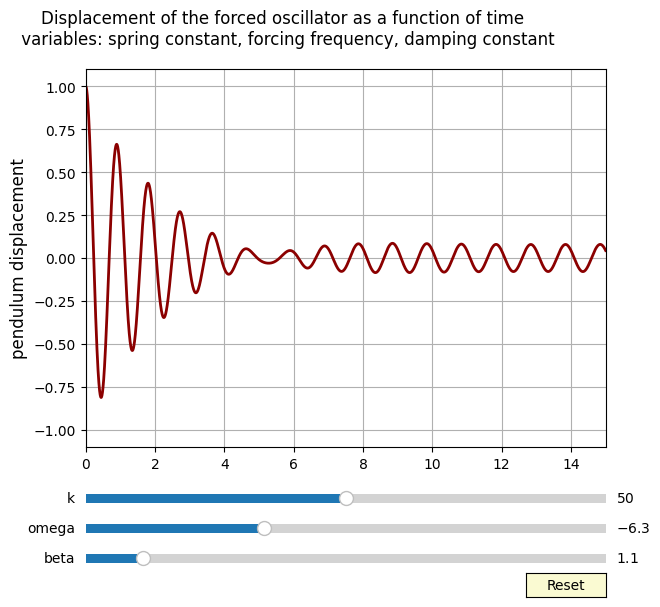

In [ ]:
####################
### 'wykres2.py' ###
####################


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from math import exp, sin, pi, sqrt, cos, log10


def ff1(y2):
    """
    :param y2: float
        The second y argument of the function.
    :return: Returns the value of a function that represents the first
    derivative of the right side of the differential equation.
    """
    return y2


def ff2(x, y1, y2):
    """
    :param x: float
        The x argument of the function.
    :param y1: float
        The first y argument of the function.
    :param y2: float
        The second y argument of the function.
    :return: Returns the value of a function that represents the second order
    of the right side of differential equation.
    """
    return A * sin(omega * x) - beta * y2 - k * y1


def rk4_2d(left, right, ndiv, y1_0, y2_0, fun1, fun2):
    """
    :param left: float
        The left limit of the x axis values.
    :param right: float
        The right limit of the x axis values.
    :param ndiv: int
        The number of divisions between the left and right limit.
        This parameter is used to modify the grid parameter of the aproximation.
    :param y1_0: float
        The first derivative of the evaluated function at x equal 0.
    :param y2_0: float
        The second derivative of the evaluated function at x equal 0.
    :param fun1: function
        The first auxiliary function that takes three arguments (x, y1, y2).
    :param fun2: function
        The second auxiliary function that takes three arguments (x, y1, y2).
    :return: Returns the three lists 'xp', 'yp_1' and 'yp_2' which contain
    x axis values, y values being a solution to differential equation and
    y values representing the first derivative of that solution.
    Function values are evaluated using the Runge_Kutta method.
    """
    h = (right - left) / ndiv
    yp_1 = [y1_0]
    yp_2 = [y2_0]
    xp = [a]
    for i in range(0, ndiv):
        k1_1 = h * fun1(yp_2[i])
        k1_2 = h * fun2(xp[i], yp_1[i], yp_2[i])

        k2_1 = h * fun1(yp_2[i] + k1_2 / 2.0)
        k2_2 = h * fun2(xp[i] + h / 2.0,
                        yp_1[i] + k1_1 / 2.0,
                        yp_2[i] + k1_2 / 2.0)

        k3_1 = h * fun1(yp_2[i] + k2_2 / 2.0)
        k3_2 = h * fun2(xp[i] + h / 2.0,
                        yp_1[i] + k2_1 / 2.0,
                        yp_2[i] + k2_2 / 2.0)

        k4_1 = h * fun1(yp_2[i] + k3_2)
        k4_2 = h * fun2(xp[i] + h, yp_1[i] + k3_1, yp_2[i] + k3_2)

        yp_1.append(yp_1[i] + (k1_1 + 2.0 * k2_1 + 2.0 * k3_1 + k4_1) / 6.0)
        yp_2.append(yp_2[i] + (k1_2 + 2.0 * k2_2 + 2.0 * k3_2 + k4_2) / 6.0)
        xp.append(xp[i] + h)
    return xp, yp_1, yp_2


def update(_):
    """
    :param _: none
    :return: Does not return. Function updates the graph when k is changed
    on the slider.
    """
    # get current values
    global k, omega, beta
    k = sk.val
    omega = somega.val
    beta = sbeta.val
    # recalculate
    x, y1, y2 = rk4_2d(a, b, n, 1, 0, ff1, ff2)
    l.set_ydata(y1)
    # redraw the figure
    fig.canvas.draw_idle()


def reset(_):
    """
    :param _: none
    :return: Does not return. Function resets all graph variables and
    graph status.
    """
    sk.reset()
    somega.reset()
    sbeta.reset()


# configure subplot
fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle('Displacement of the forced oscillator as a function of time \n variables: '
             'spring constant, forcing frequency, damping constant' ,
             fontsize=12)
plt.subplots_adjust(left=0.25, bottom=0.25)
ax.set_ylabel('pendulum displacement', fontsize=12)
ax.grid()
t = np.arange(0.0, 1.0, 0.001)

# set initial values and graph status
k = 50
delta_k = 1.0
a = 0.0
b = 15.0
n = 10000
A = 1
omega = -2 * pi
delta_omega = 0.05
beta = 1.1
delta_beta = 0.05
x_lst, y1_lst, y2_lst = rk4_2d(a, b, n, 1, 0, ff1, ff2)
l, = plt.plot(x_lst, y1_lst, linewidth=2, color='darkred')
plt.axis([0, 15, -1.1, 1.1])

# configure axes
axcolor = 'lightgoldenrodyellow'
axk = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
axomega = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axbeta = plt.axes([0.25, 0.05, 0.65, 0.03], facecolor=axcolor)

# add slider for k, omega and beta
sk = Slider(axk, 'k', 0.0, 100.0, valinit=k, valstep=delta_k)
somega = Slider(axomega, 'omega', -20.0, 20.0,
                valinit=omega, valstep=delta_omega)
sbeta = Slider(axbeta, 'beta', 0.0, 10.0, valinit=beta, valstep=delta_beta)

# update sliders
sk.on_changed(update)
somega.on_changed(update)
sbeta.on_changed(update)

# reset sliders to original values when reset button is pressed
resetax = plt.axes([0.8, 0.0, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')
button.on_clicked(reset)

plt.show()

### 3. Interactive example of solving the forced oscillator equation from point 1.4 allowing changes to the value of the spring constant, forcing frequency, and damping constant in real time, and also observing changes in the total energy of the system.

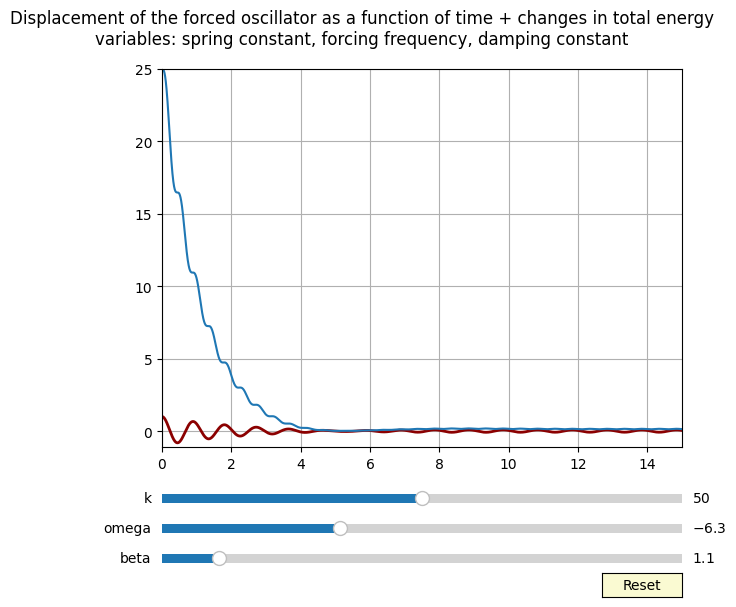

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from math import exp, sin, pi, sqrt, cos, log10


def ff1(y2):
    """
    :param y2: float
        The second y argument of the function.
    :return: Returns the value of a function that represents the first
    derivative of the right side of the differential equation.
    """
    return y2


def ff2(x, y1, y2):
    """
    :param x: float
        The x argument of the function.
    :param y1: float
        The first y argument of the function.
    :param y2: float
        The second y argument of the function.
    :return: Returns the value of a function that represents the second order
    of the right side of differential equation.
    """
    return A * sin(omega * x) - beta * y2 - k * y1


def rk4_2d(left, right, ndiv, y1_0, y2_0, fun1, fun2):
    """
    :param left: float
        The left limit of the x axis values.
    :param right: float
        The right limit of the x axis values.
    :param ndiv: int
        The number of divisions between the left and right limit.
        This parameter is used to modify the grid parameter of the aproximation.
    :param y1_0: float
        The first derivative of the evaluated function at x equal 0.
    :param y2_0: float
        The second derivative of the evaluated function at x equal 0.
    :param fun1: function
        The first auxiliary function that takes three arguments (x, y1, y2).
    :param fun2: function
        The second auxiliary function that takes three arguments (x, y1, y2).
    :return: Returns the three lists 'xp', 'yp_1' and 'yp_2' which contain
    x axis values, y values being a solution to differential equation and
    y values representing the first derivative of that solution.
    Function values are evaluated using the Runge_Kutta method.
    """
    h = (right - left) / ndiv
    yp_1 = [y1_0]
    yp_2 = [y2_0]
    xp = [a]
    for i in range(0, ndiv):
        k1_1 = h * fun1(yp_2[i])
        k1_2 = h * fun2(xp[i], yp_1[i], yp_2[i])

        k2_1 = h * fun1(yp_2[i] + k1_2 / 2.0)
        k2_2 = h * fun2(xp[i] + h / 2.0,
                        yp_1[i] + k1_1 / 2.0,
                        yp_2[i] + k1_2 / 2.0)

        k3_1 = h * fun1(yp_2[i] + k2_2 / 2.0)
        k3_2 = h * fun2(xp[i] + h / 2.0,
                        yp_1[i] + k2_1 / 2.0,
                        yp_2[i] + k2_2 / 2.0)

        k4_1 = h * fun1(yp_2[i] + k3_2)
        k4_2 = h * fun2(xp[i] + h, yp_1[i] + k3_1, yp_2[i] + k3_2)

        yp_1.append(yp_1[i] + (k1_1 + 2.0 * k2_1 + 2.0 * k3_1 + k4_1) / 6.0)
        yp_2.append(yp_2[i] + (k1_2 + 2.0 * k2_2 + 2.0 * k3_2 + k4_2) / 6.0)
        xp.append(xp[i] + h)
    return xp, yp_1, yp_2


def update(_):
    """
    :param _: none
    :return: Does not return. Function updates the graph when k is changed
    on the slider.
    """
    # get current values
    global k, omega, beta, x_lst, y1_lst, y2_lst, Ep, Ek, E
    k = sk.val
    omega = somega.val
    beta = sbeta.val
    # recalculate
    x_lst, y1_lst, y2_lst = rk4_2d(a, b, n, 1, 0, ff1, ff2)
    Ep = [0.5 * k * y ** 2 for y in y1_lst]
    Ek = [0.5 * 1 * y ** 2 for y in y2_lst]
    E = [p+k for p, k in zip(Ep, Ek)]
    line1.set_ydata(y1_lst)
    line2.set_ydata(E)
    ax.set_ylim(-1.1, E[0])
    fig.canvas.draw_idle()  # redraw the figure


def reset(_):
    """
    :param _: none
    :return: Does not return. Function resets all graph variables and
    graph status.
    """
    sk.reset()
    somega.reset()
    sbeta.reset()


# configure subplot
fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle('Displacement of the forced oscillator as a function of time + changes '
             'in total energy\nvariables: spring constant, forcing frequency, '
             'damping constant', fontsize=12)
plt.subplots_adjust(left=0.25, bottom=0.25)
ax.set_ylabel('', fontsize=12)
ax.grid()
t = np.arange(0.0, 1.0, 0.001)

# set initial values and graph status
k = 50.0
delta_k = 1.0
a = 0.0
b = 15.0
n = 10000
A = 1
omega = -2 * pi
delta_omega = 0.05
beta = 1.1
delta_beta = 0.05
x_lst, y1_lst, y2_lst = rk4_2d(a, b, n, 1, 0, ff1, ff2)
Ep = [0.5 * k * y ** 2 for y in y1_lst]
Ek = [0.5 * 1 * y ** 2 for y in y2_lst]
E = [p + k for p, k in zip(Ep, Ek)]
line1, = plt.plot(x_lst, y1_lst, linewidth=2, color='darkred')
line2, = plt.plot(x_lst, E)
plt.axis([0, 15, -1.1, E[0]])

# configure axes
axcolor = 'lightgoldenrodyellow'
axk = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
axomega = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axbeta = plt.axes([0.25, 0.05, 0.65, 0.03], facecolor=axcolor)

# add slider for k
sk = Slider(axk, 'k', 0.0, 100.0, valinit=k, valstep=delta_k)
somega = Slider(axomega, 'omega', -20.0, 20.0,
                valinit=omega, valstep=delta_omega)
sbeta = Slider(axbeta, 'beta', 0.0, 10.0, valinit=beta, valstep=delta_beta)

# update sliders
sk.on_changed(update)
somega.on_changed(update)
sbeta.on_changed(update)

# reset sliders to original values when reset button is pressed
resetax = plt.axes([0.8, 0.0, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')
button.on_clicked(reset)

plt.show()